In [16]:
from datetime import datetime
import itertools
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
plt.style.use('fivethirtyeight')

In [17]:
from iexfinance.stocks import get_historical_data
def get_iex_data(stock_list, start=datetime(2015,1,1), end=datetime(2019,12,31)):
    return_list = []
    for i in stock_list:
        df = pd.DataFrame(get_historical_data(i, start, end, output_format='pandas', token='pk_d28c0190de7a4d6da30b3bd2b08487c8'))
        df['ticker'] = i
        return_list.append(df)
    return return_list

## Import Data

In [18]:
hun_etfs = ['LQD']
data = get_iex_data(hun_etfs)
data

[              open    high     low   close   volume ticker
 date                                                      
 2015-01-12  120.94  121.19  120.87  121.13  1947954    LQD
 2015-01-13  121.13  121.28  120.91  121.24  1468308    LQD
 2015-01-14  121.71  121.82  121.35  121.45  2456856    LQD
 2015-01-15  121.53  122.27  121.45  122.08  2171301    LQD
 2015-01-16  121.71  121.91  121.23  121.40  1322527    LQD
 ...            ...     ...     ...     ...      ...    ...
 2019-12-24  127.56  127.96  127.50  127.85  2638011    LQD
 2019-12-26  128.04  128.10  127.80  128.08  3879905    LQD
 2019-12-27  128.35  128.40  128.26  128.26  8752092    LQD
 2019-12-30  127.90  128.50  127.78  128.49  9993813    LQD
 2019-12-31  128.01  128.25  127.89  127.96  5499447    LQD
 
 [1252 rows x 6 columns]]

In [19]:
splv = data[0]
splv.to_csv('lqd.csv', encoding='utf-8')

In [20]:
def clean_data(data):
    for i in range(len(data)):
        data[i] = data[i].reset_index()
        data[i]['date'] = pd.to_datetime(data[i]['date'])
        data[i] = data[i].set_index('date')
    return data

In [21]:
data = clean_data(data)

In [22]:
data

[              open    high     low   close   volume ticker
 date                                                      
 2015-01-12  120.94  121.19  120.87  121.13  1947954    LQD
 2015-01-13  121.13  121.28  120.91  121.24  1468308    LQD
 2015-01-14  121.71  121.82  121.35  121.45  2456856    LQD
 2015-01-15  121.53  122.27  121.45  122.08  2171301    LQD
 2015-01-16  121.71  121.91  121.23  121.40  1322527    LQD
 ...            ...     ...     ...     ...      ...    ...
 2019-12-24  127.56  127.96  127.50  127.85  2638011    LQD
 2019-12-26  128.04  128.10  127.80  128.08  3879905    LQD
 2019-12-27  128.35  128.40  128.26  128.26  8752092    LQD
 2019-12-30  127.90  128.50  127.78  128.49  9993813    LQD
 2019-12-31  128.01  128.25  127.89  127.96  5499447    LQD
 
 [1252 rows x 6 columns]]

In [23]:
ts = data[0]['close']

## ARIMA analysis

In [10]:
# p = d = q = range(0,3)
# pdq = list(itertools.product(p,d,q))
# pdqs = [(x[0], x[1], x[2], 5) for x in list(itertools.product(p, d, q))]
# ans = []
# for comb in pdq:
#     for combs in pdqs:
#         try:
#             mod = sm.tsa.statespace.SARIMAX(ts,
#                                             order=comb,
#                                             seasonal_order=combs,
#                                             enforce_stationarity=False,
#                                             enforce_invertibility=False)

#             output = mod.fit()
#             ans.append([comb, combs, output.aic])
#             print('ARIMA {} x {} : AIC Calculated ={}'.format(comb, combs, output.aic))
#         except:
#             continue    

In [11]:
# ans_df = pd.DataFrame(ans, columns=['pdq', 'pdqs', 'aic'])
# ans_df.loc[ans_df['aic'].idxmin()]

In [24]:
ARIMA_model = sm.tsa.statespace.SARIMAX(ts,
                                order=(2, 2, 2),
                                seasonal_order=(0, 0, 2, 5),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
output = ARIMA_model.fit()
print(output.summary().tables[1])


C:\Users\jayar\anaconda\Anaconda3\envs\PandaSpace\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0865      0.365      0.237      0.813      -0.628       0.801
ar.L2         -0.0018      0.034     -0.053      0.958      -0.069       0.065
ma.L1         -1.1453      0.366     -3.126      0.002      -1.863      -0.427
ma.L2          0.1375      0.370      0.372      0.710      -0.587       0.862
ma.S.L5       -0.0374      0.027     -1.389      0.165      -0.090       0.015
ma.S.L10       0.0151      0.029      0.515      0.606      -0.042       0.073
sigma2         0.1379      0.005     29.581      0.000       0.129       0.147


In [25]:
csv_output = output.summary().tables[1]

summary_df = pd.DataFrame(csv_output, index=None)
# csv_output.to_csv('spy_summary.csv', encoding='utf-8')
# csv_output
summary_df.columns = summary_df.iloc[0]
summary_df = summary_df[1:]

summary_df.to_csv('lqd_summary.csv', encoding='utf-8')
summary_df


,,coef,std err,z,P>|z|,[0.025,0.975]
1,ar.L1,0.0865,0.365,0.237,0.813,-0.628,0.801
2,ar.L2,-0.0018,0.034,-0.053,0.958,-0.069,0.065
3,ma.L1,-1.1453,0.366,-3.126,0.002,-1.863,-0.427
4,ma.L2,0.1375,0.370,0.372,0.710,-0.587,0.862
5,ma.S.L5,-0.0374,0.027,-1.389,0.165,-0.090,0.015
6,ma.S.L10,0.0151,0.029,0.515,0.606,-0.042,0.073
7,sigma2,0.1379,0.005,29.581,0.000,0.129,0.147


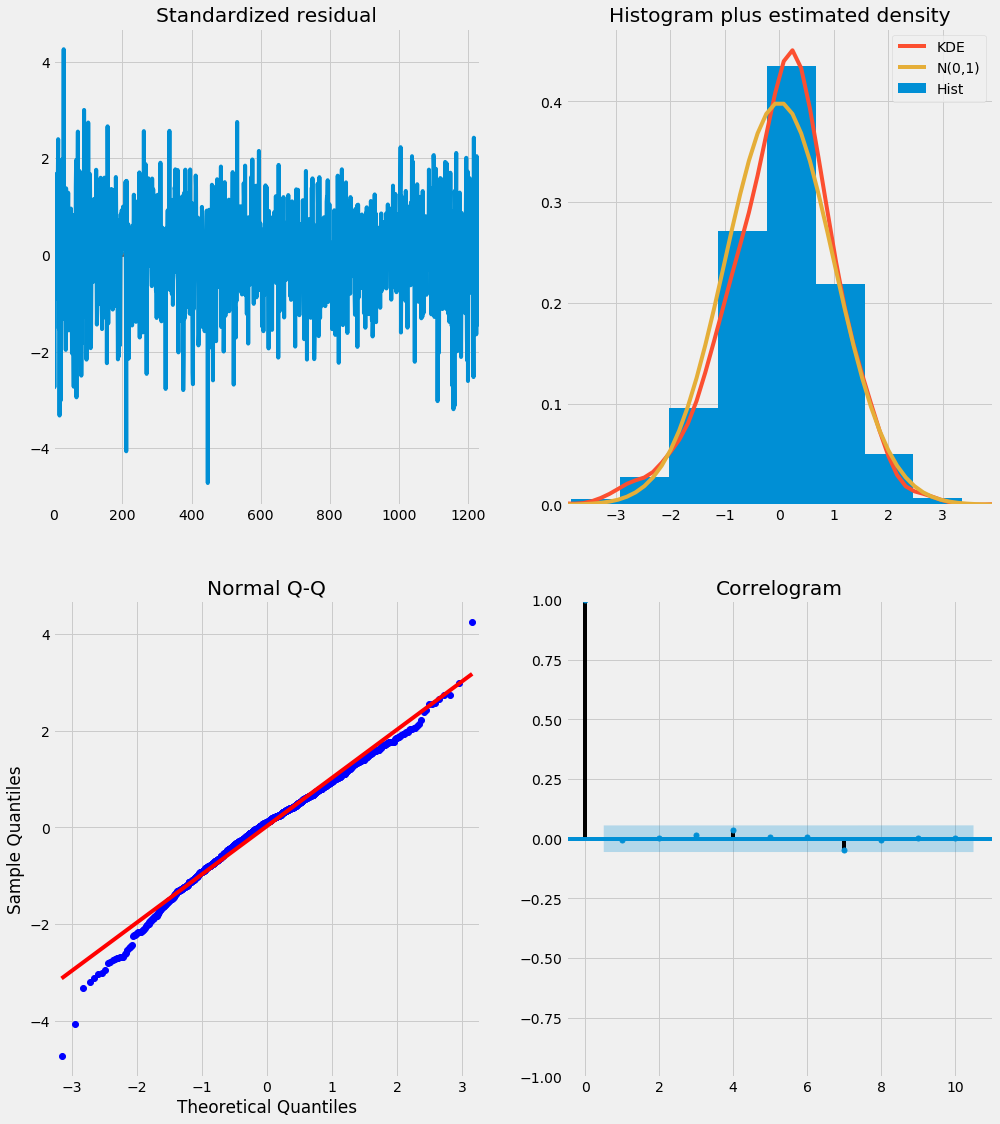

In [26]:
output.plot_diagnostics(figsize=(15, 18))
plt.savefig('lqdoutput.png')
plt.show()

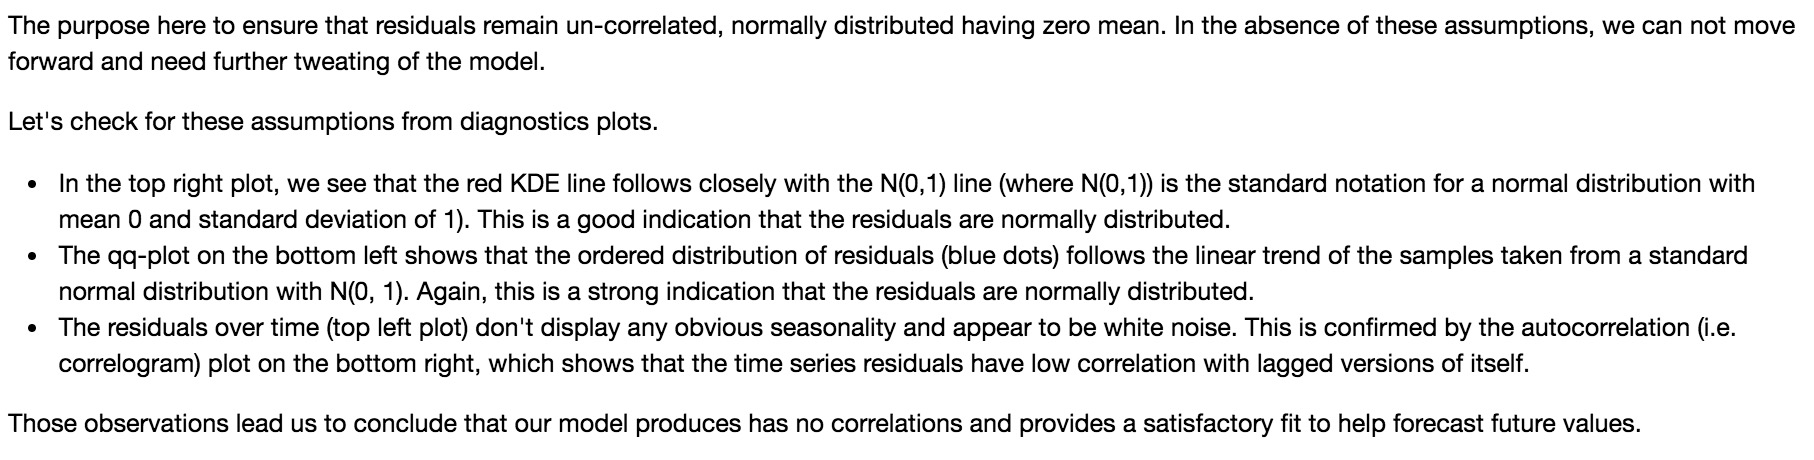

In [31]:
# plt.savefig('arima1.png')

<Figure size 432x288 with 0 Axes>

In [27]:
pred = output.get_prediction(start=pd.to_datetime('2019-11-01'), dynamic=False)
pred_conf = pred.conf_int()

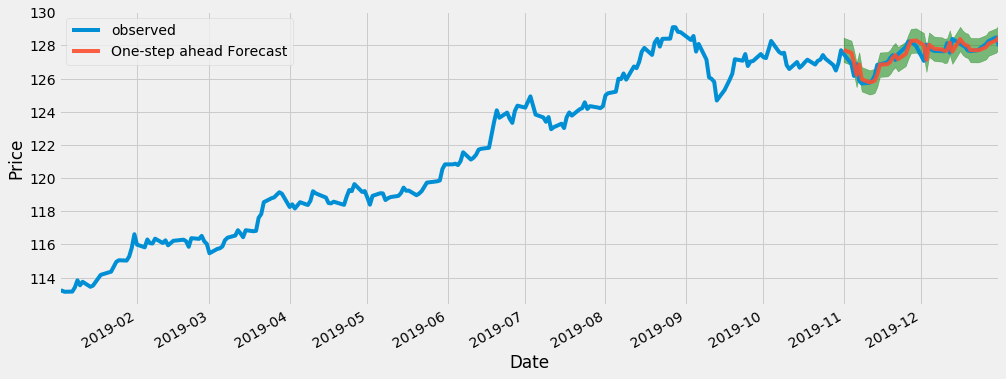

In [28]:
rcParams['figure.figsize'] = 15, 6

#Plot observed values
ax = ts['2019':].plot(label='observed')

#Plot predicted values
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.9)

#Plot the range for confidence intervals
ax.fill_between(pred_conf.index,
                pred_conf.iloc[:, 0],
                pred_conf.iloc[:, 1], color='g', alpha=.5)

#Set axes labels
ax.set_xlabel('Date')
ax.set_ylabel('Price')
plt.legend()

plt.savefig('lqdpred.png')
plt.show()

In [29]:
price_forecasted = pred.predicted_mean
price_truth = ts['2019-11-01':]

# Compute the mean square error
mse = ((price_forecasted - price_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 0.18


In [30]:
pred_dynamic = output.get_prediction(start=pd.to_datetime('2019-11-01'), dynamic=True, full_results=True)
pred_dynamic_conf = pred_dynamic.conf_int()

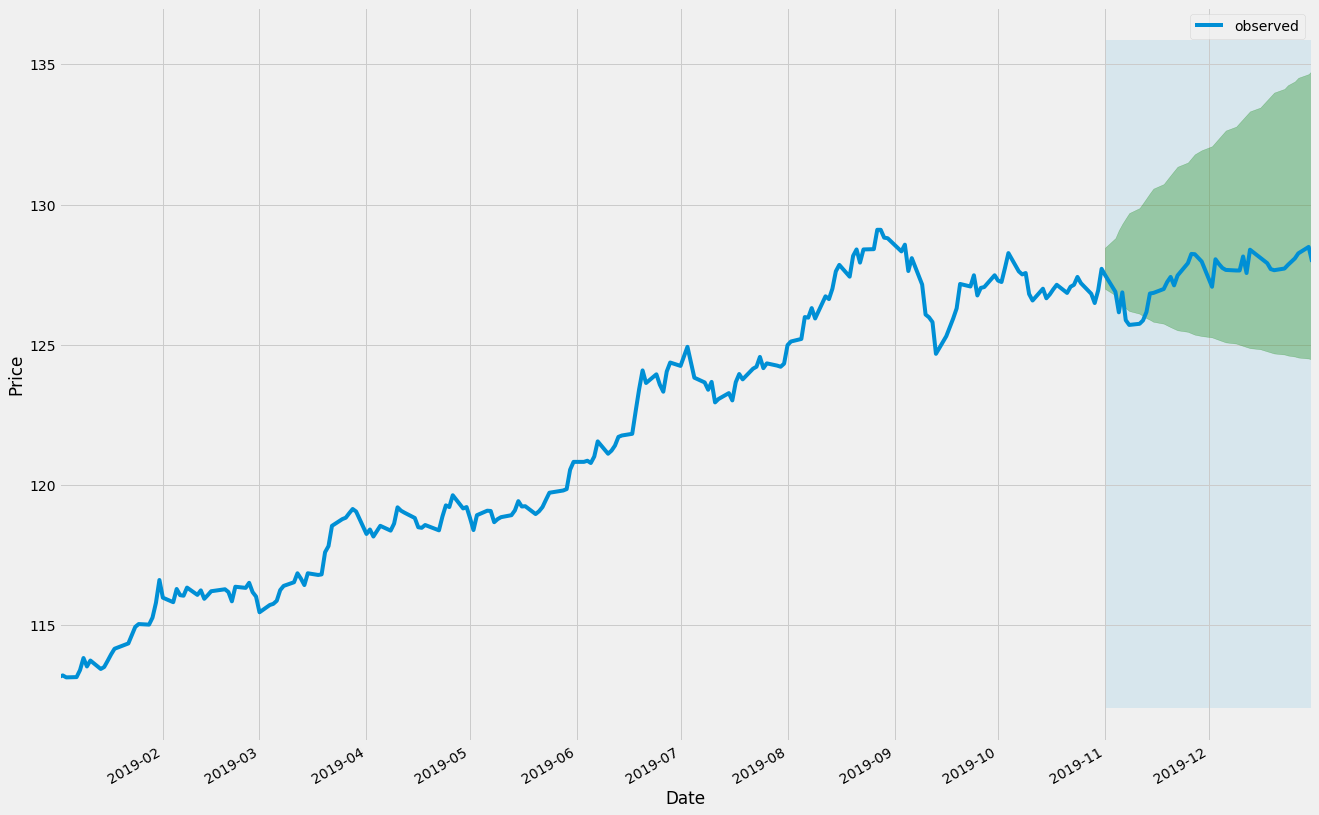

In [31]:
ax = ts['2019':].plot(label='observed', figsize=(20, 15))
# datum.plot(label='Dynamic Forecast', ax=ax)

ax.fill_between(pred_dynamic_conf.index,
                pred_dynamic_conf.iloc[:, 0],
                pred_dynamic_conf.iloc[:, 1], color='g', alpha=.3)

ax.fill_betweenx(ax.get_ylim(), pd.to_datetime('2019-11-01'), price_forecasted.index[-1], alpha=.1, zorder=-1)

ax.set_xlabel('Date')
ax.set_ylabel('Price')

plt.legend()
plt.savefig('lqdpred2.png')
plt.show()

In [32]:
price_forecasted = pred_dynamic.predicted_mean
price_truth = ts['2019-11-01':]

# Compute the mean square error
mse = ((price_forecasted - price_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 1.79


In [33]:
prediction = output.get_forecast(steps=50)

# Get confidence intervals of forecasts
pred_conf = prediction.conf_int()

C:\Users\jayar\anaconda\Anaconda3\envs\PandaSpace\lib\site-packages\statsmodels\tsa\base\tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


## FBProphet for Future

In [34]:
from fbprophet import Prophet as proph
spy = pd.DataFrame(data[0]['close']).reset_index()
spy.columns = ['ds', 'y']

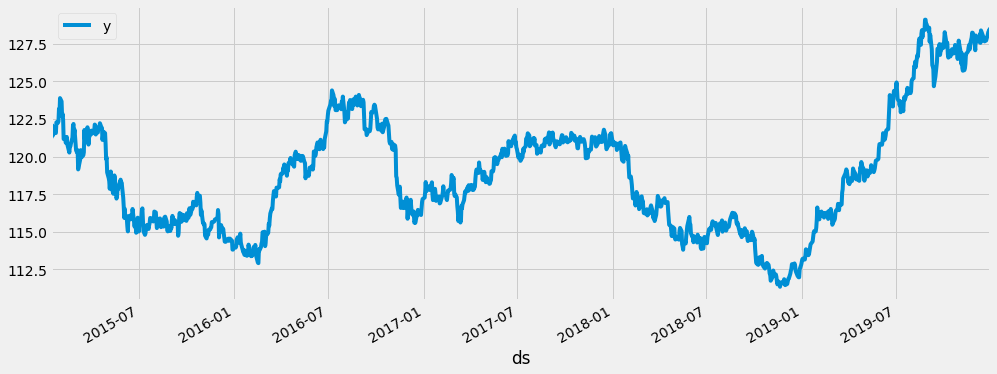

In [35]:
spy.set_index('ds').plot()

In [36]:
p = proph(interval_width=.95)
p.fit(spy)
inp = p.make_future_dataframe(periods=30, freq='D')
out = p.predict(inp)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\jayar\anaconda\Anaconda3\envs\PandaSpace\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.



In [37]:
df = out[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

In [38]:
spy_df_novjan = df.tail(71)
spy_df_novjan.dtypes

ds            datetime64[ns]
yhat                 float64
yhat_lower           float64
yhat_upper           float64
dtype: object

In [27]:
# def get_iex_data(stock_list, start=datetime(2019,11,1), end=datetime(2020,1,10)):
#     return_list = []
#     for i in stock_list:
#         df = pd.DataFrame(get_historical_data(i, start, end, output_format='pandas', token='pk_d28c0190de7a4d6da30b3bd2b08487c8'))
#         df['ticker'] = i
#         return_list.append(df)
#     return return_list
# etf = ['VV']
# data = get_iex_data(etf)
# pull = data[0]['close']
# pull_df = pd.DataFrame(pull)

In [28]:
# pull_df

In [39]:
spy_yf = pd.read_csv('LQD_yf.csv')
spy_yf = spy_yf.rename(columns={"Date": "ds"})
spy_yf['ds'] = pd.to_datetime(spy_yf['ds'])

spy_yf.dtypes

ds           datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume                int64
dtype: object

In [40]:
spy_yf1 = spy_yf[['ds','Adj Close']]
spy_yf1

,ds,Adj Close
0,2019-11-01,126.811302
1,2019-11-04,126.214493
2,2019-11-05,125.488388
3,2019-11-06,126.194603
4,2019-11-07,125.209869
5,2019-11-08,125.040779
6,2019-11-11,125.080566
7,2019-11-12,125.199936
8,2019-11-13,125.498337
9,2019-11-14,126.154823


In [41]:
comb = spy_df_novjan.join(spy_yf1.set_index('ds'), on='ds')
# comb = comb.set_index('ds')
comb['difference'] = comb['Adj Close'] - comb['yhat']
comb['difference_pct'] = comb['difference']/comb['Adj Close']
comb['difference_pct'] = comb['difference_pct'].map("{:.2%}".format)
comb.to_csv('lqd_predict_fbprophet.csv', encoding='utf-8')
comb = comb.drop([1252])
comb = comb.drop([1255])
comb = comb.drop([1256])
comb.tail(50)

,ds,yhat,yhat_lower,yhat_upper,Adj Close,difference,difference_pct
1229,2019-11-27,127.188195,125.956454,128.382601,127.547356,0.359161,0.28%
1230,2019-11-29,127.335149,126.127306,128.631364,127.288750,-0.046399,-0.04%
1231,2019-12-02,127.412041,126.197072,128.574365,126.736206,-0.675835,-0.53%
1232,2019-12-03,127.479955,126.292117,128.746061,127.713638,0.233683,0.18%
1233,2019-12-04,127.565003,126.235970,128.818494,127.544075,-0.020928,-0.02%
1234,2019-12-05,127.607762,126.382512,128.853835,127.404449,-0.203313,-0.16%
1235,2019-12-06,127.683590,126.464700,128.931175,127.334633,-0.348957,-0.27%
1236,2019-12-09,127.695755,126.482143,128.886520,127.314690,-0.381065,-0.30%
1237,2019-12-10,127.738799,126.523431,128.964407,127.314690,-0.424109,-0.33%
1238,2019-12-11,127.798529,126.602063,129.042416,127.813362,0.014833,0.01%


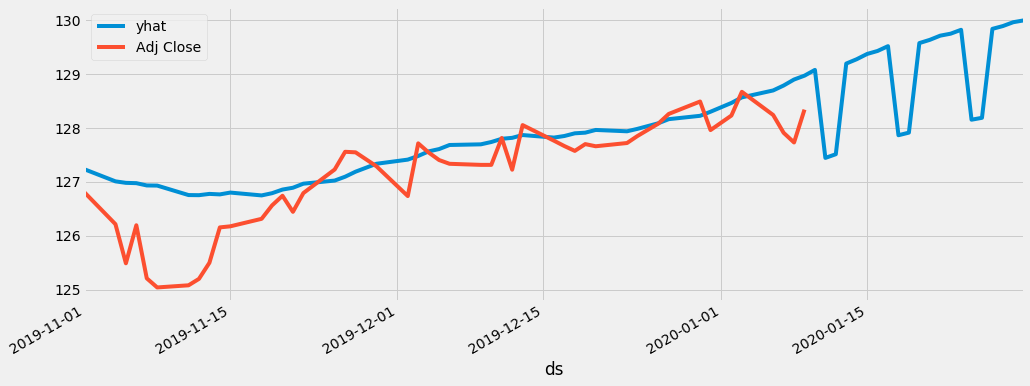

In [42]:
comb.plot(x="ds", y=["yhat", "Adj Close"], kind="line")
plt.savefig('lqd_fbproph_forecast.png')

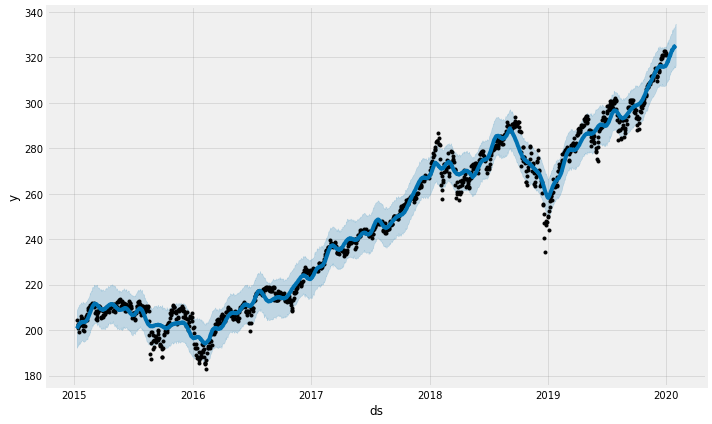

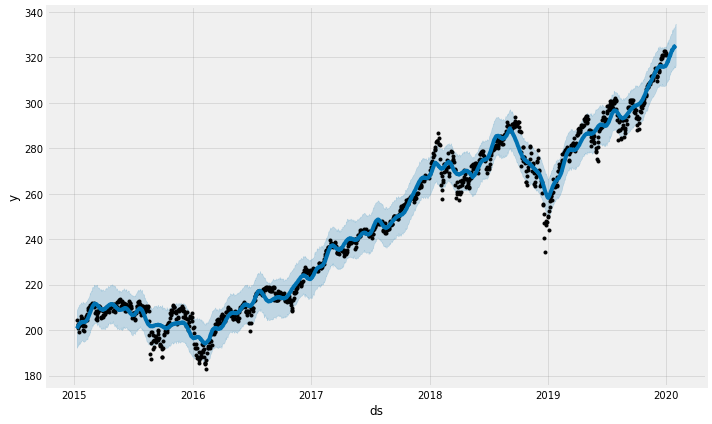

In [44]:
p.plot(df)
plt.savefig('what.png')

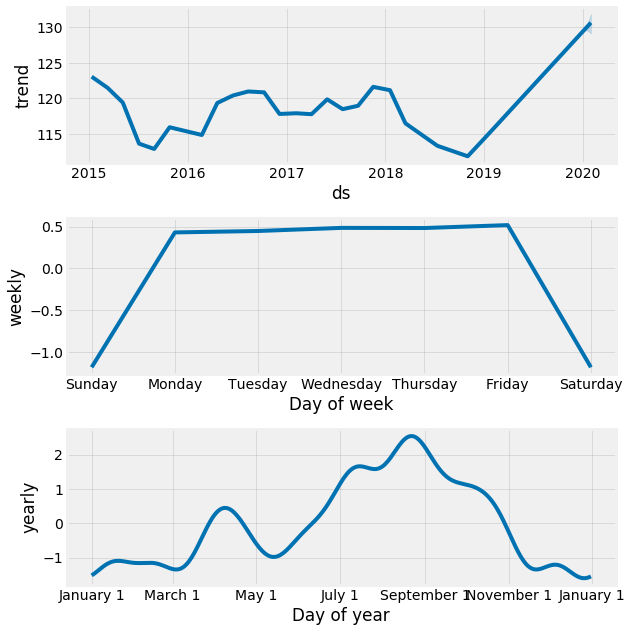

In [43]:
p.plot_components(out)
plt.savefig('lqdmovement.png')

In [44]:
split = pd.to_datetime('2019-12-01')
true = spy.set_index('ds')[split:]
past = spy.set_index('ds')[:split].reset_index()

In [45]:
pro = proph(interval_width=.95)
pro.fit(past)
inp = pro.make_future_dataframe(periods=20, freq='D').set_index('ds')[split:].reset_index()
out = pro.predict(inp)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [46]:
pred = out[['ds', 'yhat']].set_index('ds')